<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/BitCoin-Predictor/BitCoinApallaktiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

#Εισαγωγή του αρχείου
uploaded = files.upload()


In [ ]:
import pandas as pd

#Διάβασμα του αρχείου και εμφάνηση των 5 πρώτων στηλών
df = pd.read_csv('BTC_USD Bitfinex Historical Data.csv')
df.head()


In [ ]:
#Μετατροπή των δεδομένων σε αριθμητική μορφή και μετατροπή της μεταβλητής date σε ημερομηνία

# Αντικατάσταση κόμματος με τελεία και μετατροπή σε float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Vol.'] = df['Vol.'].str.replace('K', 'e3').str.replace(',', '').astype(float)

# Αφαίρεση του % και μετατροπή της στήλης Change % σε float
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

#Μετατροπή της στήλης Date σε τύπο ημερομηνίας
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Έλεγχος ότι έγιναν οι επιθυμητές αλλαγές
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      366 non-null    datetime64[ns]
 1   Price     366 non-null    float64       
 2   Open      366 non-null    float64       
 3   High      366 non-null    float64       
 4   Low       366 non-null    float64       
 5   Vol.      366 non-null    float64       
 6   Change %  366 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.1 KB
None


In [ ]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=e146ef428aaea7e6613358ffaab7f33c2ed63bd150a64fbccb612b61a527483e
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
#Υπολογισμός των τεχνικών δεικτών ΜΑ_10 RSI ROC OBV
import pandas_ta as ta

# 10-ημερών κινητός μέσος όρος
df['MA_10'] = df['Price'].rolling(window=10).mean()

# Υπολογισμός RSI (14 ημερών)
df['RSI'] = ta.rsi(df['Price'], length=14)

# Υπολογισμός ROC (10 ημερών)
df['ROC'] = ta.roc(df['Price'], length=10)

# Υπολογισμός OBV
df['OBV'] = ta.obv(df['Price'], df['Vol.'])

# Εμφάνιση του αποτελέσματος
print('Όλα τα δεδομένα \n',df)


Όλα τα δεδομένα 
           Date    Price     Open     High      Low    Vol.  Change %    MA_10  \
0   2024-01-01  44175.0  42323.0  44190.0  42232.0  1160.0      4.38      NaN   
1   2024-01-02  44991.0  44175.0  45892.0  44175.0  3100.0      1.85      NaN   
2   2024-01-03  42869.0  44991.0  45559.0  40499.0  4190.0     -4.72      NaN   
3   2024-01-04  44221.0  42869.0  44798.0  42673.0  1850.0      3.15      NaN   
4   2024-01-05  44189.0  44221.0  44415.0  42746.0  1890.0     -0.07      NaN   
..         ...      ...      ...      ...      ...     ...       ...      ...   
361 2024-12-27  94419.0  95883.0  97534.0  93630.0   530.0     -1.53  97148.2   
362 2024-12-28  95533.0  94419.0  95854.0  94311.0   290.0      1.18  96678.5   
363 2024-12-29  93944.0  95533.0  95556.0  93199.0   590.0     -1.66  96321.4   
364 2024-12-30  92982.0  93944.0  95130.0  91696.0  1820.0     -1.02  95833.9   
365 2024-12-31  93780.0  92982.0  96400.0  92175.0  1120.0      0.86  95483.0   

         

In [ ]:
# Έλεγχος για ελλιπείς τιμές και αριθμός δειγμάτων
missing_values = df.isnull().sum()
print("Ελλιπείς τιμές ανά στήλη:\n", missing_values)

#Εμφανιση του μεγέθους του dataset
print("Αριθμός γραμμών (δειγμάτων):", df.shape[0])
print("Αριθμός στηλών (χαρακτηριστικών):", df.shape[1])

#Αφαίρεση των τιμών NaN από το dataset και εμφάνιση ξανα των χαμένων τιμών για επιβεβαίωση
df = df.dropna()
print("Ελλιπείς τιμές ανά στήλη:\n", df.isnull().sum())

#Εμφάνιση του τελικού μεγέθους του dataset
print("Αριθμός γραμμών (δειγμάτων):", df.shape[0])
print("Αριθμός στηλών (χαρακτηριστικών):", df.shape[1])

Ελλιπείς τιμές ανά στήλη:
 Date         0
Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
MA_10        9
RSI         14
ROC         10
OBV          0
dtype: int64
Αριθμός γραμμών (δειγμάτων): 366
Αριθμός στηλών (χαρακτηριστικών): 11
Ελλιπείς τιμές ανά στήλη:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
MA_10       0
RSI         0
ROC         0
OBV         0
dtype: int64
Αριθμός γραμμών (δειγμάτων): 352
Αριθμός στηλών (χαρακτηριστικών): 11


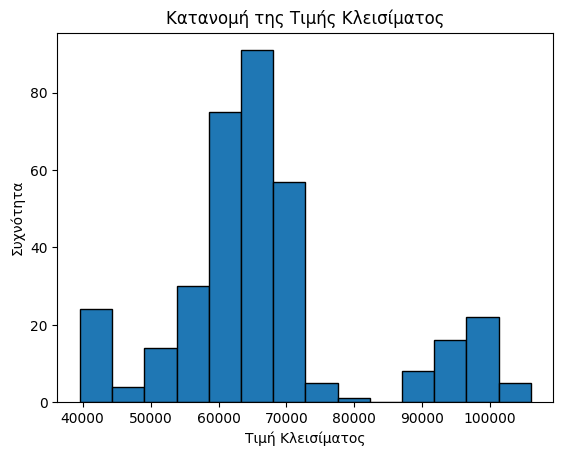

In [ ]:
# Έλεγχος κατανομής
import matplotlib.pyplot as plt

# Ιστόγραμμα της τιμής κλεισίματος

plt.hist(df['Price'], bins=14, edgecolor='black')
plt.title('Κατανομή της Τιμής Κλεισίματος')
plt.xlabel('Τιμή Κλεισίματος')
plt.ylabel('Συχνότητα')
plt.show()


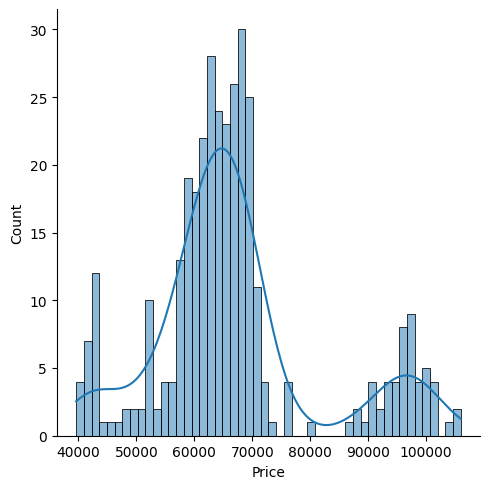

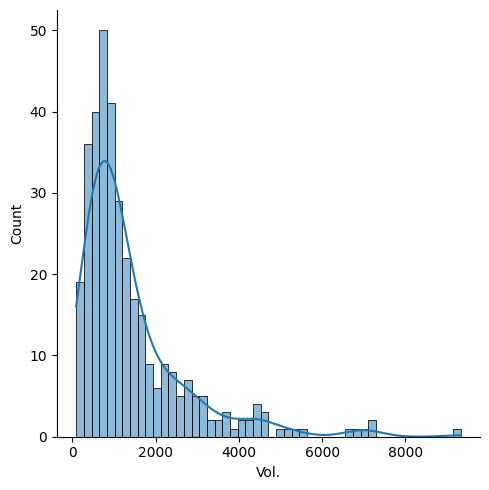

In [ ]:
#έλεγχος κατανομής της τιμής και του όγκου αγορών
import seaborn as sns

sns.displot( df['Price'], kde = True, bins = 50 )

sns.displot( df['Vol.'], kde = True, bins = 50 )



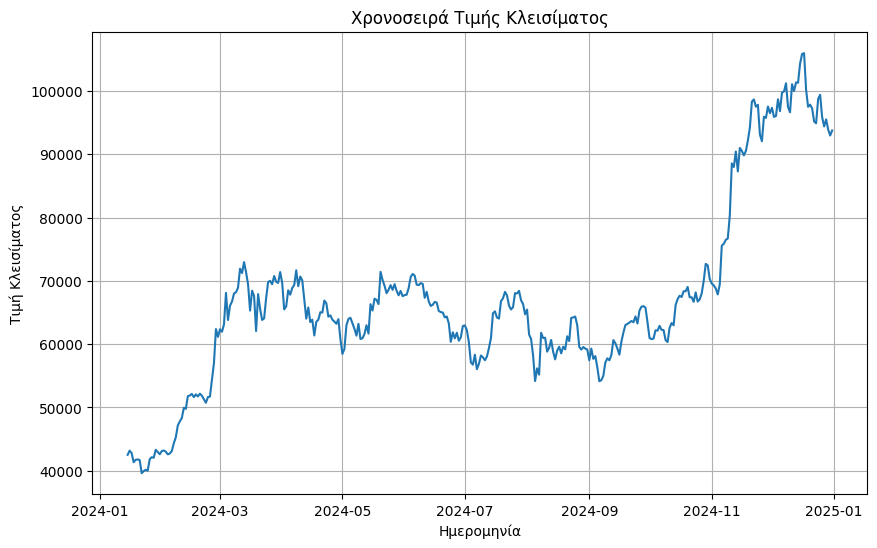

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Χρονοσειρά Τιμής Κλεισίματος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.grid(True)
plt.show()


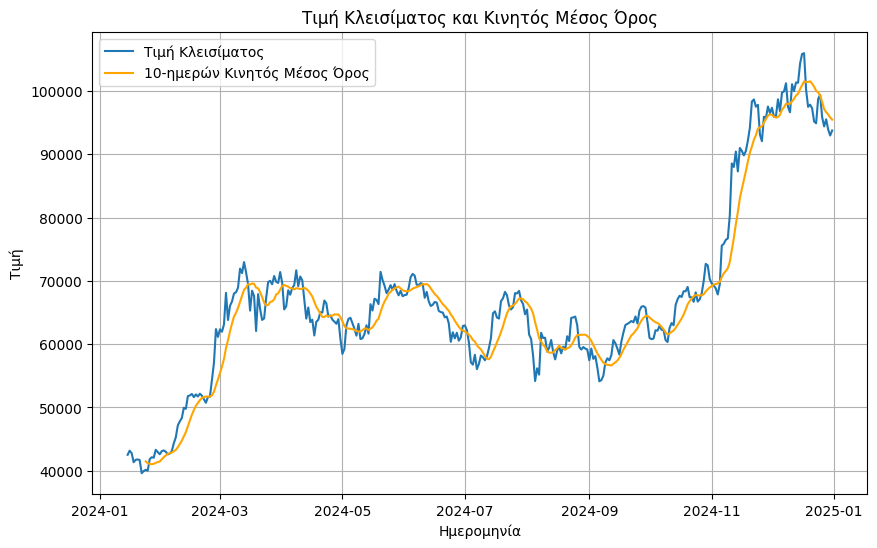

In [ ]:
df['Moving_Average'] = df['Price'].rolling(window=10).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Τιμή Κλεισίματος')
plt.plot(df['Date'], df['Moving_Average'], label='10-ημερών Κινητός Μέσος Όρος', color='orange')
plt.title('Τιμή Κλεισίματος και Κινητός Μέσος Όρος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή')
plt.legend()
plt.grid(True)
plt.show()


<Axes: >

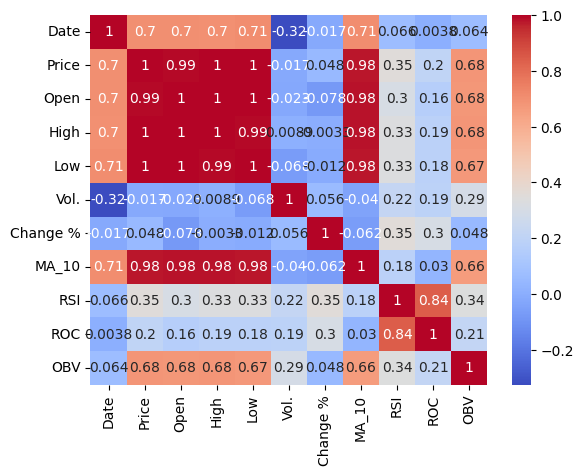

In [ ]:

sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
